In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [17]:
# ensure the column exists
X_train['Age_imputed'] = X_train.get('Age_imputed', X_train['Age'])
X_test['Age_imputed']  = X_test.get('Age_imputed',  X_test['Age'])

# FIXED LINES
X_train.loc[X_train['Age_imputed'].isna(), 'Age_imputed'] = (
    X_train['Age'].dropna().sample(
        n=int(X_train['Age_imputed'].isna().sum()), replace=True, random_state=42
    ).to_numpy()
)

X_test.loc[X_test['Age_imputed'].isna(), 'Age_imputed'] = (
    X_train['Age'].dropna().sample(
        n=int(X_test['Age_imputed'].isna().sum()), replace=True, random_state=42
    ).to_numpy()
)


In [18]:
X_train['Age'].isnull().sum()

np.int64(148)

/var/folders/wb/x1d85jgs4f7gs00g9q286y6h0000gn/T/ipykernel_2585/2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
/var/folders/wb/x1d85jgs4f7gs00g9q286y6h0000gn/T/ipykernel_2585/2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

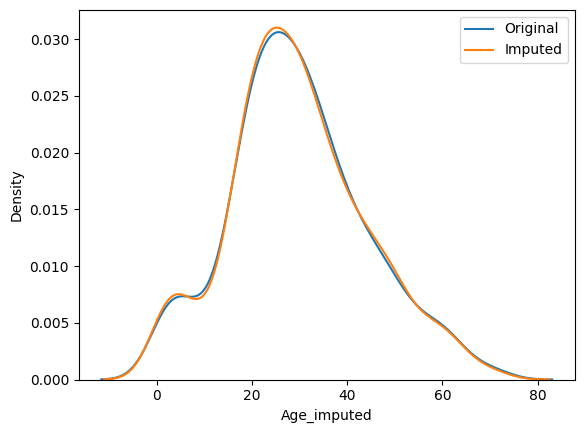

In [19]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

<Axes: >

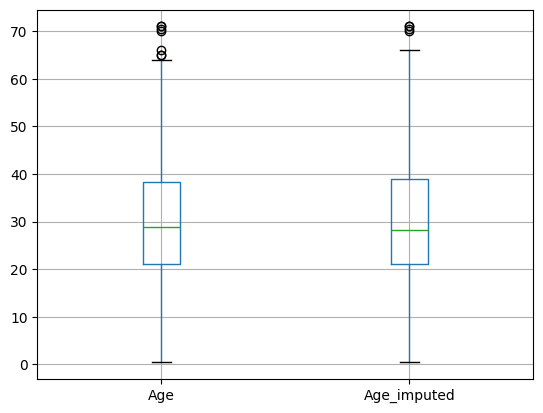

In [20]:
X_train[['Age', 'Age_imputed']].boxplot()

## in this we fill random values from that column